In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! pip install roboflow -q
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
# Load YOLO Coral Detector project workspace
from roboflow import Roboflow
rf = Roboflow(api_key="ClBanWrKh09C5WLspcun")
project = rf.workspace("coralbase").project("coral-detector")
version = project.version(4)

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Load Robowflow dataset
dataset = version.download("yolov8", location="/content/drive/MyDrive/yolov8dataset/")

# ⭐ MODEL TRAINING

 Import YOLOv8 small model

In [7]:

from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolov8s.pt")

In [ ]:
# Train model
model.train(data="//content/drive/MyDrive/yolov8dataset/data.yaml",
            epochs=100,
            imgsz=640,
            batch=16,
            project="/content/drive/MyDrive/yolov8-training",
            name="coral-detector"
)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolov8s.pt, data=//content/drive/MyDrive/yolov8dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8-training, name=coral-detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolov8dataset/train/labels... 1806 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1806/1806 [09:33<00:00,  3.15it/s]


train: New cache created: /content/drive/MyDrive/yolov8dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/yolov8dataset/valid/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:27<00:00,  1.77it/s]

val: New cache created: /content/drive/MyDrive/yolov8dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/yolov8-training/coral-detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov8-training/coral-detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.08G     0.9996      1.517      1.472         55        640: 100%|██████████| 113/113 [00:46<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         49         86      0.269       0.36      0.221     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.03G       1.16      1.359      1.584         83        640: 100%|██████████| 113/113 [00:46<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49         86      0.098      0.163     0.0682      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.02G      1.206      1.381      1.625         54        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49         86      0.703      0.384      0.482       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.02G       1.19      1.398       1.62         63        640: 100%|██████████| 113/113 [00:44<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49         86      0.769      0.442      0.521       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.05G      1.144      1.297      1.579         62        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49         86      0.448      0.501      0.466      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.06G      1.077      1.207       1.52         48        640: 100%|██████████| 113/113 [00:44<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         49         86      0.811      0.453      0.556      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.05G      1.038      1.192      1.495         62        640: 100%|██████████| 113/113 [00:44<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49         86      0.711        0.5      0.572      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         4G      1.006      1.149      1.476         60        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         49         86      0.768        0.5      0.616      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.06G     0.9657      1.078      1.445         54        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49         86      0.802      0.535       0.66      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.04G     0.9199      1.049      1.413         62        640: 100%|██████████| 113/113 [00:44<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         49         86      0.726      0.535      0.599      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.88G     0.9186      1.047       1.41         57        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49         86      0.808      0.605      0.676      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.97G     0.9204      1.046      1.411         38        640: 100%|██████████| 113/113 [00:44<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49         86      0.854       0.61      0.715      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.06G      0.882     0.9852      1.381         57        640: 100%|██████████| 113/113 [00:44<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         49         86      0.664      0.651      0.657      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.07G     0.8709     0.9769      1.371         46        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49         86      0.827       0.61      0.687      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.04G     0.8527     0.9407      1.357         45        640: 100%|██████████| 113/113 [00:43<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49         86      0.709      0.593      0.679      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.03G     0.8377     0.9319      1.338         37        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49         86      0.694      0.605      0.654      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.9G     0.8306     0.9042      1.334         66        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49         86       0.85      0.616      0.695      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.05G     0.7934     0.8682      1.301         55        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49         86      0.709      0.593      0.598      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.06G     0.7986     0.8713      1.308         44        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49         86      0.683       0.64      0.649       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.02G     0.7973       0.85       1.31         38        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49         86      0.746      0.593      0.686      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.06G     0.7776     0.8357      1.289         63        640: 100%|██████████| 113/113 [00:43<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         49         86       0.82      0.582      0.696      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.04G     0.7588     0.8119      1.288         54        640: 100%|██████████| 113/113 [00:44<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49         86      0.677      0.674      0.688      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.04G     0.7662     0.7995      1.288         57        640: 100%|██████████| 113/113 [00:44<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49         86      0.853      0.523      0.656      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.05G     0.7409     0.7953      1.272         42        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49         86      0.681       0.62      0.645      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.89G     0.7326     0.7827       1.26         66        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49         86      0.694      0.686      0.724      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.01G     0.7419     0.7709      1.263         46        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49         86      0.685      0.628      0.624      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.04G     0.7145      0.744      1.243         56        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         49         86      0.841      0.628      0.699      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.03G     0.7159     0.7515      1.247         58        640: 100%|██████████| 113/113 [00:45<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         49         86      0.863      0.587      0.695      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.09G     0.7096      0.725      1.238         83        640: 100%|██████████| 113/113 [00:44<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49         86      0.869      0.581      0.711      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.89G     0.7005     0.7187      1.232         52        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49         86      0.782      0.581      0.694      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.05G     0.6834     0.7031      1.221         62        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49         86      0.823      0.605      0.674      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.86G     0.6784     0.6873      1.208         64        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49         86      0.815      0.565       0.66      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.08G     0.6626     0.6707      1.205         65        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         49         86        0.7      0.593       0.63       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.06G     0.6646      0.669      1.204         45        640: 100%|██████████| 113/113 [00:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49         86      0.727       0.64      0.663      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.04G     0.6546     0.6476      1.193         48        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49         86      0.842       0.57      0.676      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.05G      0.648     0.6456      1.196         59        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         49         86      0.783       0.63      0.716      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.06G     0.6525     0.6546      1.197         32        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


                   all         49         86      0.864      0.558      0.655      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.06G     0.6298     0.6216      1.177         58        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49         86      0.746      0.648      0.653      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.88G     0.6336     0.6148       1.18         47        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49         86      0.727      0.651       0.68      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.02G     0.6169     0.6034      1.161         53        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49         86      0.778      0.686      0.724      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.08G     0.5978     0.6022      1.152         53        640: 100%|██████████| 113/113 [00:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49         86       0.85      0.595       0.72      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.07G     0.6058     0.5905      1.157         54        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49         86      0.729      0.686      0.683      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.04G     0.6042     0.5897      1.164         51        640: 100%|██████████| 113/113 [00:45<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         49         86      0.832       0.64      0.722      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.86G     0.5979     0.5815      1.156         51        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49         86      0.804      0.628      0.679      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.05G     0.5944     0.5704      1.155         46        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         49         86      0.835      0.616      0.701       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.03G     0.5901     0.5653      1.145         65        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         49         86      0.867      0.606      0.711      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.07G     0.5682     0.5429      1.129         44        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         49         86      0.677      0.733      0.679      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.85G     0.5695       0.55      1.132         61        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49         86      0.721      0.744       0.68      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.05G     0.5865     0.5512      1.139         66        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49         86      0.792      0.662      0.734      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.88G     0.5589     0.5366      1.129         48        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49         86      0.875      0.616      0.751      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.03G     0.5564     0.5185      1.128         39        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49         86      0.886      0.605      0.703      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.03G     0.5471     0.5154      1.115         54        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49         86      0.692      0.674      0.674      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.06G     0.5472      0.509       1.12         45        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49         86      0.795      0.628      0.675      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.04G     0.5399     0.5028      1.119         57        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49         86      0.816       0.67      0.696      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.04G     0.5412     0.4985      1.114         59        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49         86      0.768       0.64      0.708      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.02G      0.531     0.4963      1.111         61        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49         86      0.824      0.605       0.71      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.08G     0.5229      0.482      1.097         51        640: 100%|██████████| 113/113 [00:47<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49         86      0.837      0.593      0.711      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.04G     0.5238     0.4801      1.095         49        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49         86      0.698      0.733      0.735      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.06G     0.5194     0.4771      1.099         58        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         49         86       0.75      0.628      0.687      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.02G     0.5029     0.4682      1.086         59        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49         86      0.801      0.607       0.71      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.06G     0.5131     0.4635      1.091         52        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49         86      0.808      0.651      0.729      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.04G     0.5043     0.4662      1.093         48        640: 100%|██████████| 113/113 [00:46<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]


                   all         49         86      0.822      0.646      0.687      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.88G     0.5037     0.4537       1.09         56        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49         86      0.841      0.709      0.748      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.03G     0.4911     0.4483      1.071         57        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49         86      0.763      0.733        0.7      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.05G     0.4876     0.4516       1.08         45        640: 100%|██████████| 113/113 [00:47<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49         86      0.838       0.66      0.706      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.04G     0.4948     0.4451      1.078         52        640: 100%|██████████| 113/113 [00:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49         86      0.892      0.579      0.705      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.88G     0.4779     0.4408      1.067         67        640: 100%|██████████| 113/113 [00:46<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         49         86      0.803      0.616      0.698      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.87G     0.4739      0.443       1.07         40        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49         86      0.822      0.605        0.7      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.87G     0.4766       0.43      1.068         68        640: 100%|██████████| 113/113 [00:46<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         49         86      0.749      0.686      0.721      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.88G      0.461     0.4192      1.058         66        640: 100%|██████████| 113/113 [00:46<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         49         86      0.825      0.628      0.728      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.88G     0.4539     0.4188      1.056         43        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49         86      0.758      0.698      0.697      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.86G     0.4555     0.4126      1.055         54        640: 100%|██████████| 113/113 [00:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49         86      0.855       0.64      0.696      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.06G     0.4565     0.4056      1.059         57        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49         86      0.808      0.605       0.69      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.88G     0.4516     0.4129      1.052         64        640: 100%|██████████| 113/113 [00:46<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49         86      0.767       0.64       0.64      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.04G     0.4443     0.4061      1.052         66        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49         86      0.729      0.651       0.68      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         4G     0.4483     0.3992      1.047         58        640: 100%|██████████| 113/113 [00:46<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         49         86      0.836      0.628      0.722      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.9G     0.4397     0.3956      1.047         49        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49         86      0.783       0.64      0.684      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.04G     0.4319     0.3909      1.042         51        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49         86       0.78       0.64      0.693      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.04G     0.4308     0.3879      1.038         52        640: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         49         86      0.829      0.628      0.682      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.02G     0.4368     0.3938      1.047         55        640: 100%|██████████| 113/113 [00:45<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49         86       0.85      0.592      0.683      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.05G     0.4322     0.3886      1.041         68        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49         86      0.848      0.605      0.685      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.04G     0.4285     0.3802      1.034         60        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         49         86      0.813       0.64      0.694      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.04G     0.4116     0.3758      1.032         44        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49         86      0.711      0.709      0.695      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.02G     0.4159     0.3737      1.034         50        640: 100%|██████████| 113/113 [00:44<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49         86      0.791       0.64      0.694      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.04G     0.4057     0.3605      1.019         56        640: 100%|██████████| 113/113 [00:45<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49         86      0.771       0.64       0.69      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.04G     0.4018     0.3578      1.023         45        640: 100%|██████████| 113/113 [00:44<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49         86      0.812      0.616      0.695       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.04G     0.4098     0.3664      1.036         42        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49         86      0.868      0.614      0.701      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.02G     0.3955     0.3503      1.022         83        640: 100%|██████████| 113/113 [00:45<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         49         86      0.782       0.64       0.69      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.89G      0.397     0.3659       1.02         50        640: 100%|██████████| 113/113 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         49         86      0.771      0.664      0.688      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.88G     0.3938     0.3485      1.021         56        640: 100%|██████████| 113/113 [00:44<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         49         86      0.831      0.663      0.713      0.548


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.02G     0.3158     0.3045     0.9543         18        640: 100%|██████████| 113/113 [00:46<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         49         86      0.822      0.628      0.678      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         4G     0.2869     0.2601     0.9312         29        640: 100%|██████████| 113/113 [00:43<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49         86      0.846      0.637        0.7       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.04G     0.2824     0.2577       0.93         27        640: 100%|██████████| 113/113 [00:43<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         49         86      0.825       0.66      0.725      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.04G     0.2739     0.2359     0.9294         28        640: 100%|██████████| 113/113 [00:43<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         49         86       0.84      0.628      0.725      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.02G     0.2671     0.2389     0.9195         27        640: 100%|██████████| 113/113 [00:44<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         49         86      0.774      0.686      0.717      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         4G     0.2618     0.2308     0.9165         25        640: 100%|██████████| 113/113 [00:43<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         49         86      0.783      0.672      0.715      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.9G     0.2638     0.2375     0.9154         28        640: 100%|██████████| 113/113 [00:44<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49         86       0.82      0.651      0.716      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.86G     0.2615     0.2341     0.9139         20        640: 100%|██████████| 113/113 [00:43<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49         86      0.775      0.686      0.717      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.04G      0.255     0.2272     0.9121         22        640: 100%|██████████| 113/113 [00:44<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         49         86      0.771      0.674      0.704      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         4G     0.2556     0.2327     0.9172         21        640: 100%|██████████| 113/113 [00:43<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49         86      0.765      0.683      0.716      0.572



100 epochs completed in 1.322 hours.
Optimizer stripped from /content/drive/MyDrive/yolov8-training/coral-detector/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/yolov8-training/coral-detector/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/yolov8-training/coral-detector/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


                   all         49         86      0.874      0.616      0.751      0.591
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8-training/coral-detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8c5709f410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

CALCULATE THE PREFORMANCE SCORES !!!✨

In [ ]:
from ultralytics import YOLO
import tensorflow as tf
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model_yolo = YOLO('/content/drive/MyDrive/yolov8-training/coral-detector/weights/best.pt')
model_sctld = tf.keras.models.load_model("1.keras")

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def getPredictionInfo(model, image_array, conf_threshold=0.0):
    if image_array is None:
        raise ValueError("Could not load the image. Check the path.")

    results = model.predict(image_array)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    confidences = results[0].boxes.conf.cpu().numpy()
    class_ids = results[0].boxes.cls.cpu().numpy()

    valid_indices = confidences >= conf_threshold
    boxes = boxes[valid_indices]
    confidences = confidences[valid_indices]
    class_ids = class_ids[valid_indices]
    return results, boxes, confidences, class_ids, image_array


def draw_prediction_yolo(model, image_array, color=(4, 225, 239), thickness=2, font_scale=0.5, font_thickness=2, conf_threshold=0.0):
    result, boxes, confidences, class_ids, image_array = getPredictionInfo(model=model, image_array=image_array, conf_threshold=conf_threshold)
    if len(boxes) == 0:
      return convert_color_type(image_array)
    for xyxy, conf, class_id in zip(boxes, confidences, class_ids):
        xy1 = (int(xyxy[0]), int(xyxy[1]))
        xy2 = (int(xyxy[2]), int(xyxy[3]))

        cv2.rectangle(image_array, xy1, xy2, color, thickness)

        label = f"Class Coral: {conf:.2f}"

        # Get text size for background rectangle
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
        label_bg_xy1 = xy1
        label_bg_xy2 = (xy1[0] + text_width + 4, xy1[1] - text_height - 4)

        # Draw the class and confidence score in the bounding box
        cv2.rectangle(image_array, label_bg_xy1, label_bg_xy2, color, -1)
        cv2.putText(image_array, label, (xy1[0] + 2, xy1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return convert_color_type(image_array)

def crop_prediction(image_array, model, conf_threshold=0.0):
    result, boxes, confidences, class_ids, image_array = getPredictionInfo(model=model, image_array=image_array, conf_threshold=conf_threshold)
    if len(boxes) != 0:
      cropped_image_arrays = []
      for i, xyxy in enumerate(boxes):
          x1, y1, x2, y2 = map(int, xyxy)
          cropped_region = image_array[y1:y2, x1:x2]
          cropped_image_arrays.append(cropped_region)
      return cropped_image_arrays, boxes, image_array

def convert_color_type(image_array, bgr_to_rgb=True):
  if bgr_to_rgb == True:
    image_array_converted = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
  else:
    image_array_converted = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
  return image_array_converted

def preprocess_image(image_array):
    img_array_preprocessed = cv2.resize(image_array, (224, 224))
    img_array_preprocessed = convert_color_type(image_array=img_array_preprocessed)

    return img_array_preprocessed

def getPredictionInfo_sctldcnnxyolo(model_yolo, model_sctldcnn, image_array, conf_threshold_yolo=0.0,  conf_threshold_scltdcnn=0.0):
    SCTLD_CLASSES = ['sctld_coral', 'unaffected_coral']
    result = crop_prediction(model=model_yolo, image_array=image_array, conf_threshold=conf_threshold_yolo)
    if result is not None:
        images, boxes, image_array = result

        # Initialize the lists to avoid UnboundLocalError
        filtered_images = []
        filtered_predictions = []
        filtered_labels = []
        filtered_confidences = []
        filtered_boxes = []

        for i in range(len(images)):
            images[i] = preprocess_image(images[i])
        batch_of_images = np.stack(images, axis=0)
        predictions = model_sctldcnn.predict(batch_of_images)

        for i, prediction in enumerate(predictions):
            confidence_score = max(prediction)
            if confidence_score >= conf_threshold_scltdcnn:  # Only keep high-confidence predictions
                filtered_images.append(images[i])
                filtered_predictions.append(prediction)
                filtered_labels.append(np.argmax(prediction))
                filtered_confidences.append(confidence_score)
                filtered_boxes.append(boxes[i])

        # Check if any valid predictions were made, if none return empty lists
        if not filtered_images:
            return [], [], [], [], [], image_array

        return filtered_images, filtered_predictions, filtered_labels, filtered_confidences, filtered_boxes, image_array
    else:
        return [], [], [], [], [], image_array


def draw_prediction_sctldcnnxyolo(model_yolo, model_sctldcnn, image_array, color=(4, 225, 239), thickness=2, font_scale=0.5, font_thickness=2, conf_threshold_yolo=0.0,  conf_threshold_scltdcnn=0.0):
  images_sctld = []
  confidence_scores_sctld = []
  boxes_sctld = []
  images, predictions, prediction_labels, confidence_scores, boxes, image_array = getPredictionInfo_sctldcnnxyolo(model_sctldcnn=model_sctldcnn, model_yolo=model_yolo, image_array=image_array, conf_threshold_yolo=conf_threshold_yolo, conf_threshold_scltdcnn=conf_threshold_scltdcnn)
  image_array = convert_color_type(image_array)
  if len(images) == 0:
    return convert_color_type(image_array)
  for i in range(len(images)):
    if prediction_labels[i] == 0:
      images_sctld.append(images[i])
      confidence_scores_sctld.append(confidence_scores[i])
      boxes_sctld.append(boxes[i])
  for xyxy, conf, image in zip(boxes_sctld, confidence_scores_sctld, images_sctld):
    xy1 = (int(xyxy[0]), int(xyxy[1]))
    xy2 = (int(xyxy[2]), int(xyxy[3]))
    cv2.rectangle(image_array, xy1, xy2, color, thickness)

    label = f"SCTLD {conf:.2f}"

    # Get text size for background rectangle
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    label_bg_xy1 = xy1
    label_bg_xy2 = (xy1[0] + text_width + 4, xy1[1] - text_height - 4)

    # Draw the class and confidence score in the bounding box
    cv2.rectangle(image_array, label_bg_xy1, label_bg_xy2, color, -1)
    cv2.putText(image_array, label, (xy1[0] + 2, xy1[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)
  return convert_color_type(image_array)

def draw_videoprediction_sctldcnnxyolo(model_yolo, model_sctldcnn, video_path, color=(4, 225, 239), thickness=2, font_scale=0.5, font_thickness=2, conf_threshold_yolo=0.0, conf_threshold_scltdcnn=0.0):
    cap = cv2.VideoCapture(video_path)
    frame_skip = 5  # Show every 5th frame
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_skip == 0:
            processed_frame = draw_prediction_sctldcnnxyolo(model_yolo=model_yolo, model_sctldcnn=model_sctldcnn, image_array=frame, conf_threshold_yolo=conf_threshold_yolo, conf_threshold_scltdcnn=conf_threshold_scltdcnn)
            # Yield the processed frame
            yield processed_frame
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()





In [ ]:
controlled_image_path = "/content/drive/MyDrive/yolov8dataset/test/images/IMG_1863_jpg.rf.44a9be25bb05fc51d5c8c1f26cdc1fb4.jpg"
image = cv2.imread(controlled_image_path)

In [ ]:
controlled_video_path = "/sctld_cutvid - Made with Clipchamp_1742351778891.mp4"

In [ ]:
draw_videoprediction_sctldcnnxyolo(model_yolo=model_yolo, model_sctldcnn=model_sctld, video_path=controlled_video_path)

<generator object draw_videoprediction_sctldcnnxyolo at 0x7f1a9833fa00>

In [ ]:
for frame in draw_videoprediction_sctldcnnxyolo(model_yolo=model_yolo, model_sctldcnn=model_sctld, video_path=controlled_video_path):
    cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cap = cv2.VideoCapture(controlled_video_path)


frame_skip = 5  # Show every 5th frame
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_skip == 0:
        cv2_imshow(draw_prediction_sctldcnnxyolo(model_yolo=model_yolo, model_sctldcnn=model_sctld, image_array=frame, conf_threshold_yolo=0.65,conf_threshold_scltdcnn=0.9))
    frame_count += 1

cap.release()
cv2.destroyAllWindows()



Output hidden; open in https://colab.research.google.com to view.


0: 640x640 2 Corals, 655.9ms
Speed: 5.3ms preprocess, 655.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
0
1.0


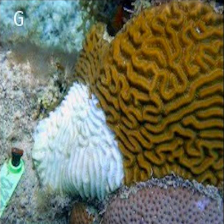

In [ ]:
images, predictions, prediction_labels, confidence_scores, boxes, image_array = getPredictionInfo_sctldcnnxyolo(model_sctldcnn=model_sctld, model_yolo=model_yolo, image_array=image, conf_threshold_scltdcnn=0.9)

for i in range(len(images)):
  print(prediction_labels[i])
  print(confidence_scores[i])
  cv2_imshow(convert_color_type(images[i]))


0: 640x640 2 Corals, 1160.8ms
Speed: 4.7ms preprocess, 1160.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1


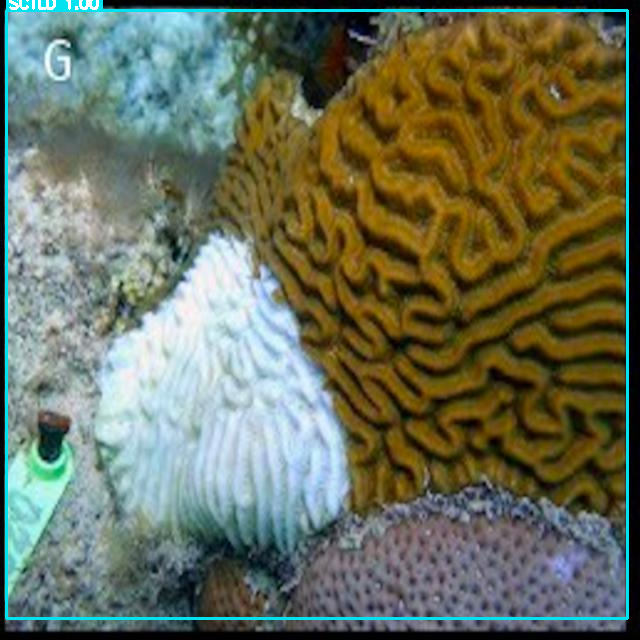

In [ ]:
result = draw_prediction_sctldcnnxyolo(model_yolo=model_yolo, model_sctldcnn=model_sctld, image_array=image, conf_threshold_scltdcnn=0.9)
cv2_imshow(convert_color_type(result))

In [ ]:
metrics_default = metrics_3= model.val(project="/content/drive/MyDrive/yolov8metrics/noA_val")

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 15.7MB/s]
val: Scanning /content/drive/MyDrive/yolov8dataset/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:12<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
metrics_cof03= model.val(project="/content/drive/MyDrive/yolov8metrics/conf03_val", conf=0.3, iou=0.6)

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/yolov8dataset/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/yolov8dataset/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:16<00:50, 16.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:34<00:34, 17.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:50<00:16, 16.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:51<00:00, 12.98s/it]


                   all         49         86      0.897      0.608      0.759      0.637
Speed: 11.3ms preprocess, 1021.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8metrics/conf03_val/val


In [ ]:
metrics = model.val(project="/content/drive/MyDrive/yolov8metrics/conf06_val", conf=0.6, iou=0.6)

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/yolov8dataset/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:49<00:00, 12.33s/it]


                   all         49         86      0.897      0.608      0.758      0.646
Speed: 12.9ms preprocess, 965.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/drive/MyDrive/yolov8metrics/conf06_val/val


In [ ]:
# CALCULATE PRECISION, RECALL, F1
confusion_matrix = metrics.confusion_matrix.matrix
true_pos = confusion_matrix[0][0]
false_pos = confusion_matrix[0][1]
false_neg = confusion_matrix[1][0]
mean_average_precision_50 = metrics.mean_results()[2]
mean_average_precision_5090 = metrics.mean_results()[3]

print(f"True positive: {true_pos}")
print(f"False positive: {false_pos}")
print(f"False negative: {false_neg}")

print("----------------------------")
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"Mean Average Precision 50: {mean_average_precision_50}")
print(f"Mean Average Precision 50-90: {mean_average_precision_5090}")

metrics_dicts = {
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "mAP-50": mean_average_precision_50,
    "mAP-5090": mean_average_precision_5090
}

print(metrics_dicts)

True positive: 54.0
False positive: 9.0
False negative: 32.0
----------------------------
Precision: 0.8571428571428571
Recall: 0.627906976744186
F1 score: 0.7248322147651007
Mean Average Precision 50: 0.757704279828838
Mean Average Precision 50-90: 0.6463675515742299
{'precision': 0.8571428571428571, 'recall': 0.627906976744186, 'f1_score': 0.7248322147651007, 'mAP-50': 0.757704279828838, 'mAP-5090': 0.6463675515742299}


In [ ]:
# VISUALIZE METRICS
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))
plt.bar(metrics_dicts.keys(), metrics_dicts.values(), color=['#1E3A5F', '#50B2C0', '#E63946', '#9B5DE5', '#FFA630'])

plt.xticks(rotation=30)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("CoralBase YOLOv8 Coral Detection Performance Metrics (OD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.yticks(np.arange(0, 1, 0.05))

for i, v in enumerate(metrics_dicts.values()):
    plt.text(i, v + 0.02, str(round(v, 3)), ha='center', fontsize=12)
plt.show()


NameError: name 'metrics_dicts' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
cnn_metrics_dict = {
    "precision": 0.97,
    "recall": 0.97,
    "f1_score": 0.97,
    "AUC": 0.98
}

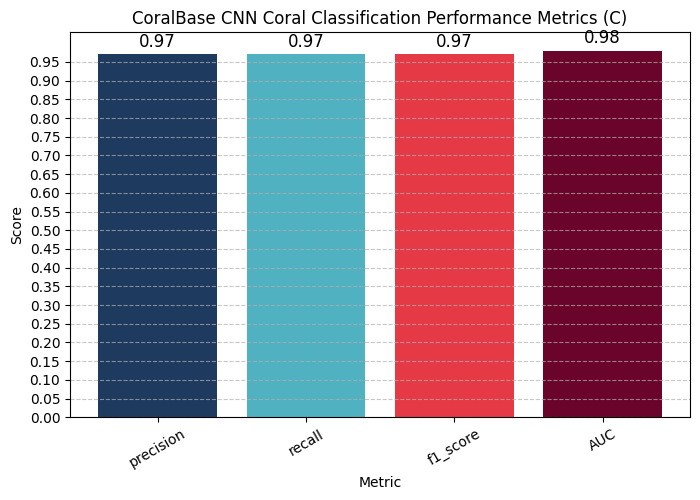

In [ ]:
# VISUALIZE METRICS
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))
plt.bar(cnn_metrics_dict.keys(), cnn_metrics_dict.values(), color=['#1E3A5F', '#50B2C0', '#E63946', '#6b042a'])

plt.xticks(rotation=30)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("CoralBase CNN Coral Classification Performance Metrics (C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.yticks(np.arange(0, 1, 0.05))

for i, v in enumerate(cnn_metrics_dict.values()):
    plt.text(i, v + 0.02, str(round(v, 3)), ha='center', fontsize=12)
plt.show()


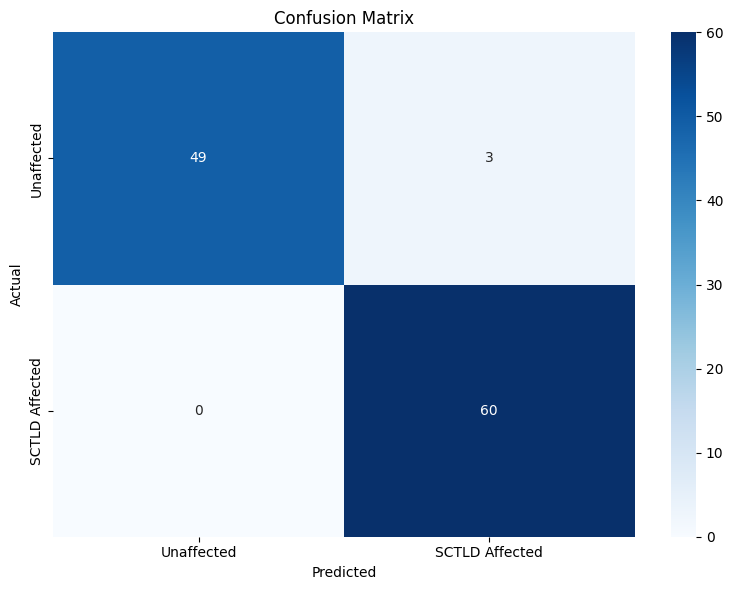

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = np.array([
    [49, 3],
    [0, 60]
])

# Define class labels
class_names = ['Unaffected', 'SCTLD Affected']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()